# Universidad Politecnica Salesiana
### Estudiante: Angel Jadan
### Materia: Inteligencia artificial 1
#### Fecha:  6/2/2021

In [15]:
from easyAI import TwoPlayersGame, Human_Player, AI_Player, Negamax
#Interfaz grafica
from tkinter import *
from tkinter import messagebox
from neo4j import GraphDatabase

In [16]:
import turtle


class Pin_pong(TwoPlayersGame):
    
    def _init_(self, numeroJugadores):
        
        self.numeroJugadores=1
        
        #Ventana
        wn = turtle.Screen()
        wn.title("Pong by Mundo Python")
        wn.bgcolor("black")
        wn.setup(width=800, height=600)
        wn.tracer(0)

        #Marcador
        marcadorA = 1
        marcadorB = 1

        #JugadorA
        jugadorA = turtle.Turtle()
        jugadorA.speed(0)
        jugadorA.shape("square")
        jugadorA.color("white")
        jugadorA.penup()#Para eliminar linea que queda marcado.
        jugadorA.goto(-350, 0)#Posicion
        jugadorA.shapesize(stretch_wid=5, stretch_len=1)

        #JugadorA
        maquina = turtle.Turtle()
        maquina.speed(0)
        maquina.shape("square")
        maquina.color("white")
        maquina.penup()
        maquina.goto(350, 0)
        maquina.shapesize(stretch_wid=5, stretch_len=1)


        #Pelota
        pelota = turtle.Turtle()
        pelota.speed(0)
        pelota.shape("square")
        pelota.color("white")
        pelota.penup()
        pelota.goto(0,0)

        #Modificar estas variables para cambiar la velocidad de la pelota
        pelota.dx = 0.3
        pelota.dy = 0.3


        #Pen para dibujar el marcador.
        pen = turtle.Turtle()
        pen.speed(0)
        pen.color("white")
        pen.penup()
        pen.hideturtle()
        pen.goto(0, 260)
        pen.write("Jugador A: 0		jugadorB: 0", align="center", font=("Courier", 25, "normal"))
        
        
        #Teclado
        wn.listen()
        wn.onkeypress(jugadorA_up, "w")
        wn.onkeypress(jugadorA_down, "s")
        
        
        
        while True:
            wn.update()

            pelota.setx(pelota.xcor() + pelota.dx)
            pelota.sety(pelota.ycor() + pelota.dy)

            #Revisa colisiones con los bordes de la ventana
            if pelota.ycor() > 290:
                pelota.dy *= -1
            if pelota.ycor() < -290:
                pelota.dy *= -1

            # Si la pelota sale por la izq o derecha, esta regresa al centro.
            if pelota.xcor() > 390:
                pelota.goto(0,0)
                pelota.dx *= -1
                marcadorA += 1
                pen.clear()

                #Esta línea de codigo vuelve a pintar el marcador, utilizo "format" de la versión 3.6 en adelante de python.
                #Si tienes python menor a la versión 3.6 esta parte no te funcionará.
                pen.write(f"Jugador A: {marcadorA} Maquina: {marcadorB}", align="center", font=("Courier", 25, "normal"))

            if pelota.xcor() < -390:
                pelota.goto(0,0)
                pelota.dx *= -1
                marcadorB += 1
                pen.clear()
                #Esta línea de codigo vuelve a pintar el marcador, utilizo "format" de la versión 3.6 en adelante de python.
                #Si tienes python menor a la versión 3.6 esta parte no te funcionará.
                pen.write(f"Jugador A: {marcadorA}     Maquina: {marcadorB}", align="center", font=("Courier", 25, "normal"))


            #Revisa las colisiones
            if ((pelota.xcor() > 340 and pelota.xcor() < 350)
                and (pelota.ycor() < maquina.ycor() + 50
                    and pelota.ycor() > maquina.ycor() - 50)):
                pelota.dx *= -1

            if ((pelota.xcor() < -340 and pelota.xcor() > -350)
                    and (pelota.ycor() < jugadorA.ycor() + 50
                    and pelota.ycor() > jugadorA.ycor() - 50)):
                pelota.dx *= -1
        
        

    def possible_moves(self):
        #Movimientos arriba
        y = maquina.ycor()
        y += 20
        #Movimientos abajo
        y = maquina.ycor()
        y -= 20
        maquina.sety(y)
        return y
        #maquina.sety(y)
    
    def make_move(self, y):
        maquina.sety(y)
        
    def unmake_move(self, y):
        maquina.sety(y)
    
    def lose(self):
        if marcadorA==10 and marcadorB<marcadorA:
            return True
        else:
            return False
    def show(self):
        print(marcadorA+marcadorB)
        
    def scoring(self):
        return -100 if self.lose() else 0
    
    def is_over(self):
        return self.lose()
    
    
    
    #Funciones
    def jugadorA_up():
        #Movimientos arriba
        y = jugadorA.ycor()
        y += 20
        jugadorA.sety(y)
        
    def jugadorA_down():
        y = jugadorA.ycor()
        y -= 20
        jugadorA.sety(y)
      

    """def maquina_up():
        y = maquina.ycor()
        y += 20
        maquina.sety(y)"""

    """def maquina_down():
        y = maquina.ycor()
        y -= 20
        maquina.sety(y)"""

    

    #wn.onkeypress(maquina_up, "Up")
    #wn.onkeypress(maquina_down, "Down")
    
    


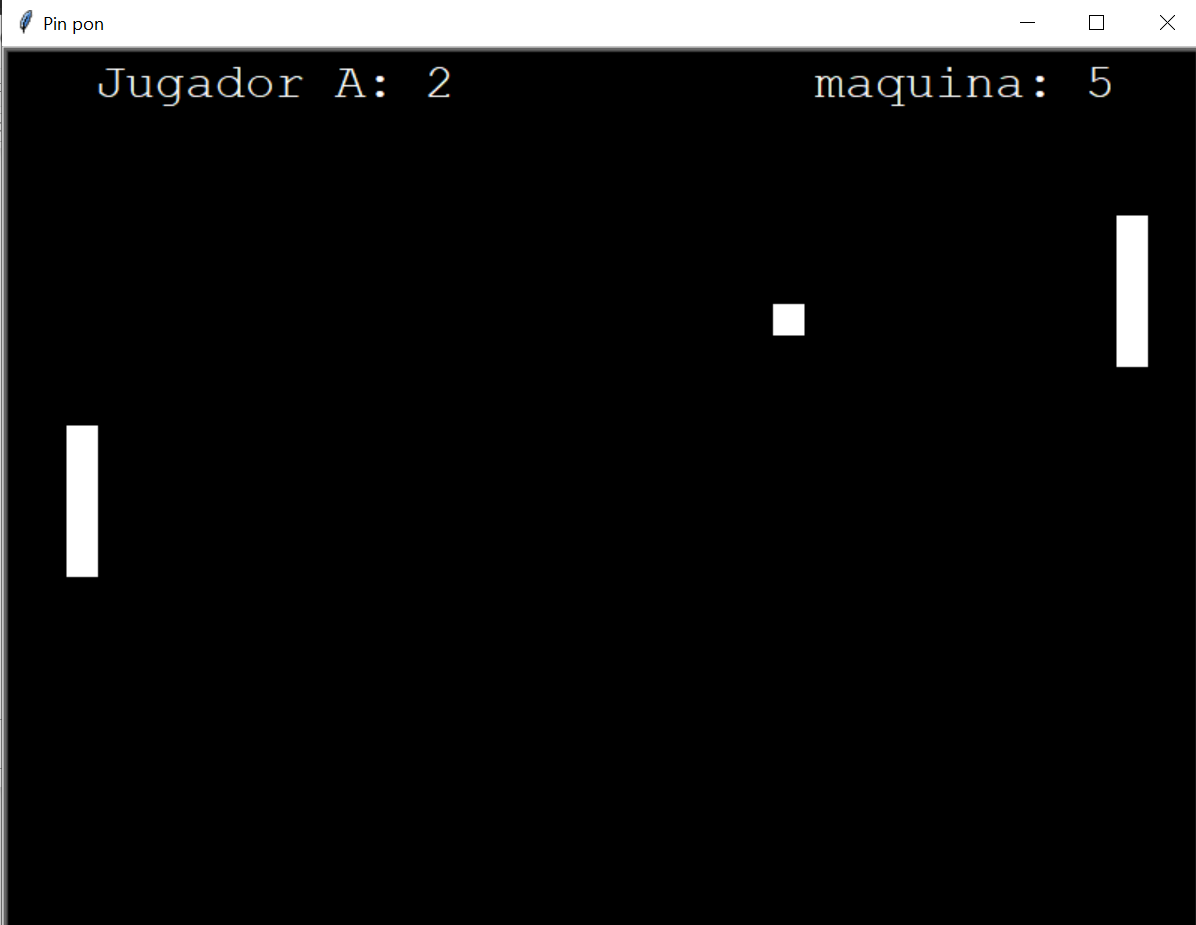

In [46]:
class Algoritmo():
    def _init_():
        crear_catalogo()
            
        uri="localhost"
        driver = GraphDatabase.driver(uri, auth=('neo4j', 'Angel2019'))
        session = driver.session(database="system")
        session = driver.session()

    '''Algoritmo A*'''
    def algaestrella(lugar):
        result = session.run("""CALL gds.alpha.allShortestPaths.stream({
      nodeProjection: '"""+lugar+"""',
      relationshipProjection: {
        ROAD: {
          type: 'DISTANCIA',
          properties: 'distancia'
        }
      },
      relationshipWeightProperty: 'distancia'
    })
    YIELD sourceNodeId, targetNodeId, distance
    WITH sourceNodeId, targetNodeId, distance
    WHERE gds.util.isFinite(distance) = true

    MATCH (source:"""+lugar+""") WHERE id(source) = sourceNodeId
    MATCH (target:"""+lugar+""") WHERE id(target) = targetNodeId
    WITH source, target, distance WHERE source <> target

    RETURN source.name AS source, target.name AS target, distance
    ORDER BY distance DESC, source ASC, target ASC
    LIMIT 10""")
        
        return result
        #print(result)
        #for record in result:
         #   print("Origen => "+record["source"]+" | Destino => "+record["target"]+" | Distancia=> "+str(record["distance"]))

        #names = [record["source"] for record in result]

        #print(names)
        session.close()
        driver.close()

    '''Algoritmo de la ruta mas corta'''
    def rutamascorta(origen, destino):
        result = session.run("""MATCH (start:Lugar {name: '"""+origen+"""'}), (end:Lugar {name: '"""+destino+"""'})
        CALL gds.alpha.shortestPath.stream({
          nodeProjection: 'Lugar',
          relationshipProjection: {
            ROAD: {
              type: 'DISTANCIA',
              properties: 'distancia',
              orientation: 'UNDIRECTED'
            }
          },
          startNode: start,
          endNode: end,
          relationshipWeightProperty: 'distancia'
        })
        YIELD nodeId, cost
        RETURN gds.util.asNode(nodeId).name AS name, cost""")
        
        return result
        #print(result)
        #for record in result:
         #   print("Origen => "+record["name"]+" | Costo => "+str(record["cost"]))

        #names = [record["source"] for record in result]

        #print(names)
        session.close()
        driver.close()

    '''Funcion para crear el catalogo para correr algoritmos'''
    def crear_catalogo():
        result = session.run("""CALL gds.graph.create('myGraph', 'Lugar', 'DISTANCIA', { relationshipProperties: 'distancia' })""")    

        session.close()
        driver.close()

    '''Algoritmo de amplitud'''
    def algaplitud(nombreNodo,lugar):
        result = session.run("""MATCH ("""+nombreNodo+""":Lugar{name:'"""+lugar+"""'})
    WITH id("""+nombreNodo+""") AS startNode
    CALL gds.alpha.bfs.stream('myGraph', {startNode: startNode})
    YIELD path
    UNWIND [ n in nodes(path) | n.name ] AS names
    RETURN names
    ORDER BY names""")
        return result
        #print(result)
        #for record in result:
         #   print("Ruta => "+record["names"])
        

        #names = [record["source"] for record in result]

        #print(names)
        session.close()
        driver.close()

    '''Algoritmo de profundidad'''
    def algprofundidad(nombreNodoOrigen,lugarOrigen,nombreNodoDestino, lugarDestino):

        result = session.run("""MATCH ("""+nombreNodoOrigen+""":Lugar{name:'"""+lugarOrigen+"""'}),
        ("""+nombreNodoDestino+""":Lugar{name:'"""+lugarDestino+"""'})
    WITH id("""+nombreNodoOrigen+""") AS startNode, [id("""+nombreNodoDestino+""")] AS targetNodes
    CALL gds.alpha.dfs.stream('myGraph', {startNode: startNode, targetNodes: targetNodes})
    YIELD path
    UNWIND [ n in nodes(path) | n.name ] AS names
    RETURN names
    ORDER BY names""")
        #print(result)
        for record in result:
            print("Ruta => "+record["names"])

        #names = [record["source"] for record in result]

        #print(names)
        session.close()
        driver.close()

    def crearNodo(nombre, comida, lugar, animal, fruta):

        result = session.run("""CREATE ("""+nombre.lower().strip()+""":Gustos{name:'"""+nombre+"""', comida='"""+comida+"""',
        lugar='"""+lugar+"""', animal='"""+animal+"""', fruta='"""+fruta+"""'})""")
        #print(result)
        session.close()
        driver.close()
        return True

In [50]:
#Crear la ventana raiz
ventana = Tk()

#Cambio den el tamaño de la ventana
ventana.geometry("750x450")

ventana.configure(background="white")
#Bloquear el tamaño de la ventana
ventana.resizable(0,0)

#Etiqueta de texto
lbltitle = Label(ventana,text="Registre sus gustos",background="white").place(x=0,y=0)
lblnombre=Label(ventana,text="Comida favorita",background="white").place(x=0,y=20)
lbldireccion=Label(ventana,text="Lugar favorito",background="white").place(x=0,y=40)
lbltelefono=Label(ventana,text="Animal favorito",background="white").place(x=0,y=60)
lblcorreo=Label(ventana,text="Fruta favorita",background="white").place(x=0,y=80)
lblcorreo=Label(ventana,text="Ingrese su nombre",background="white").place(x=0,y=100)

comida=StringVar()
txtnombre=Entry(ventana,textvariable=comida).place(x=100,y=20)
#name=nombre.get()

lugar=StringVar()
txtdireccion=Entry(ventana,textvariable=lugar).place(x=100,y=40)

animal=StringVar()
txttelefono=Entry(ventana,textvariable=animal).place(x=100,y=60)

fruta=StringVar()
txtcorreo=Entry(ventana,textvariable=fruta).place(x=100,y=80)

nombre=StringVar()
txtcorreo=Entry(ventana,textvariable=nombre).place(x=100,y=100)


def guardar():
    com = comida.get()
    lug = lugar.get()
    frut = fruta.get()
    ani = animal.get()
    nomb = nombre.get()
    
    
    algoritmo = Algoritmo()
    res = algoritmo.crearNodo(nombre, com, lug, ani, frut)
    if res == True:
        messagebox.showinfo(message="Datos guardados", title="Sms")
        comida.set("")
        fruta.set("")
        lugar.set("")
        animal.set("")
        nombre.set("")
    else:
        messagebox.showinfo(message="No se ha podido guardar revise por favor", title="Sms")
        
def jugar():
    ai_algo = Negamax(6)
    pinpon = Pin_pong([Human_Player(), AI_Player(ai_algo)])
    pinpon.play()


#Boton de comando
cFuncion=Button(ventana, command = guardar , text="Guardar",width=10,height=2).place(x=110, y=120)
cFuncion=Button(ventana, command = jugar , text="Jugar",width=10,height=2).place(x=210, y=120)


lblorigen=Label(ventana,text="Lugar de origen",background="white").place(x=0,y=180)
origen=StringVar()
txtorigen=Entry(ventana,textvariable=origen).place(x=100,y=180)

lbldestino=Label(ventana,text="Lugar de destino",background="white").place(x=210,y=180)
origen=StringVar()
txtdestino=Entry(ventana,textvariable=origen).place(x=310,y=180)

algoritmo = Algoritmo()

def prof():
    nombreOrigen = txtorigen.get().strip().lower()
    lugarOrigen = txtorigen.get()
    nombreDestino = txtdestino.get().strip().lower()
    lugarDestino = txtdestino.get()
    
    res = algoritmo.algprofundidad(nombreOrigen,lugarOrigen,nombreDestino, lugarDestino)
    messagebox.showinfo(message=res, title="Sms")
    
def aestrella():
    lugar = txtorigen.get()
    res = algoritmo.algaestrella(lugar)
    messagebox.showinfo(message=res, title="Sms")
    
def ruta():
    origen = txtorigen.get()
    destino = txtdestino.get()
    res = algoritmo.rutamascorta(origen, destino)
    messagebox.showinfo(message=res, title="Sms")
    
def amp():
    nombreNodo = origen.get().lower().strip()
    lugar = origen.get()
    res = algoritno.algaplitud(nombreNodo,lugar)
    messagebox.showinfo(message=res, title="Sms")
    


lblcorreo=Label(ventana,text="Algorimos a correr",background="white").place(x=110,y=210)

cFuncion=Button(ventana, command = prof , text="Profundidad",width=10,height=2).place(x=10, y=240)
cFuncion=Button(ventana, command = amp , text="Ampitud",width=10,height=2).place(x=110, y=240)
cFuncion=Button(ventana, command = aestrella , text="A*",width=10,height=2).place(x=210, y=240)
cFuncion=Button(ventana, command = ruta , text="Ruta mas corta",width=11,height=2).place(x=310, y=240)


ventana.mainloop()

#### Interfaz grafica
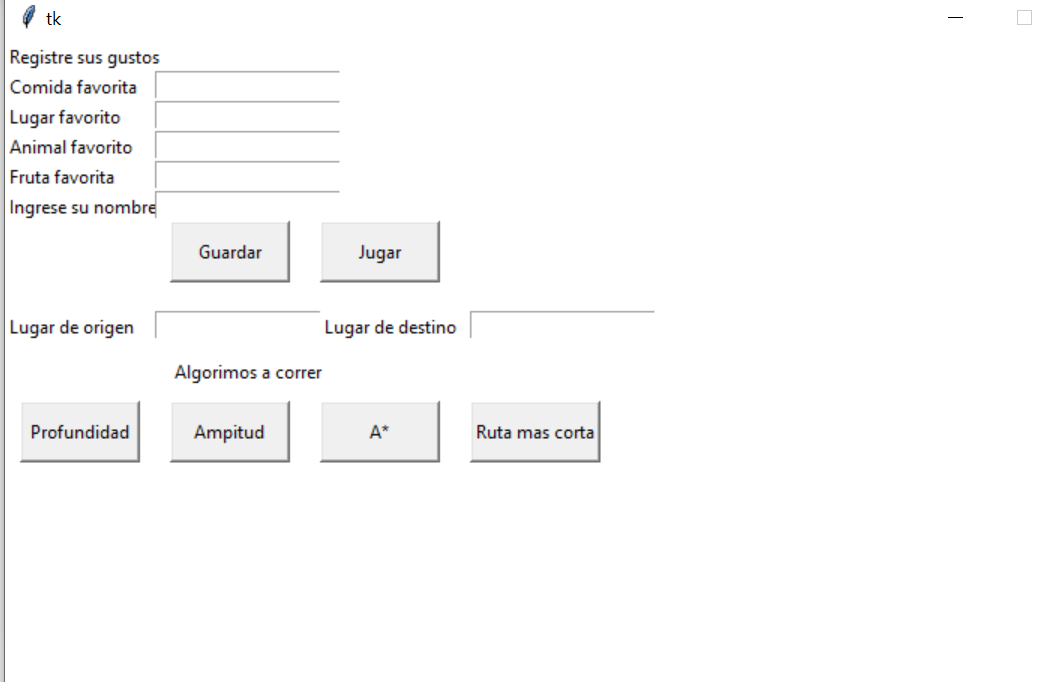